In [3]:
!pip install windpowerlib

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import data as wt
from windpowerlib import turbine_cluster_modelchain,WindTurbine,WindFarm




In [75]:
weather_Data=pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx:pd.to_datetime(idx,utc=True))
weather_Data

C:\Users\akmel\AppData\Local\Temp\ipykernel_11828\896817417.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  weather_Data=pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx:pd.to_datetime(idx,utc=True))


variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


Wind Turbine selection

In [69]:
Turbine_lib=wt.get_turbine_types(print_out=False)
Turbine_lib 

C:\Users\akmel\anaconda3\Lib\site-packages\windpowerlib\data.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


In [71]:
Turbine_lib = wt.get_turbine_types(print_out=False)
Turbine_lib = Turbine_lib.infer_objects(copy=False)
Turbine_lib


C:\Users\akmel\anaconda3\Lib\site-packages\windpowerlib\data.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


,manufacturer,turbine_type,has_power_curve,has_cp_curve
0,Adwen/Areva,AD116/5000,True,False
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True
...,...,...,...,...
62,Vestas,V80/2000,True,False
63,Vestas,V90/2000,True,True
64,Vestas,V90/2000/GS,True,True
65,Vestas,V90/3000,True,False


In [53]:
selected_turbine= {'turbine_type':'E48/800','hub_height':60} 
W_Turbine = WindTurbine(**selected_turbine)

In [63]:
##wind_turbine_fleet= pd.DataFrame({'wind_turbine':[W_Turbine,None],
                                  #'number_of_turbines':[10,None],})
farm_data ={
             'wind_turbine_fleet':[W_Turbine.to_group(10)],
             'efficiency':0.9
}
farm_data1  =WindFarm(**farm_data)

Wind_farm_Sub_Model={'wake_losses_model':'wind_farm_efficiency',
                      'smoothing':True,
                      'standard_deviation_method':'turbulence_intensity', ##'staffel_pfenniger'
                      'wind_speed_model':'hellman',                       ##'hellman'
                                                                          ##'logarithmic'
                                                                          ##'interpolation-extrapolation'
                    'density_model':'ideal_gas',                          ##'barometric'
                                                                          ##'interpolation-extrapolation'
                    'temperature_model':'linear_gradient',                ##'interpolation-extrapolation'
                    'power_output_model':'power_curve',
                    'density_correction':True,
                    'obstacle_height':0,
                    'hellman_exp':0.25
                   }


In [65]:
Model_Farm = TurbineClusterModelChain(farm_data1,**Wind_farm_Sub_Model).run_model(weather_Data)
Farm_Power_Output =(Model_Farm.power_output)/1000
Farm_Power_Output

2019-01-01 00:00:00+00:00    5143.800555
2019-01-01 01:00:00+00:00    5336.078841
2019-01-01 02:00:00+00:00    4558.117848
2019-01-01 03:00:00+00:00    1690.422179
2019-01-01 04:00:00+00:00      30.979601
                                ...     
2019-12-31 19:00:00+00:00     317.855421
2019-12-31 20:00:00+00:00     586.182770
2019-12-31 21:00:00+00:00    1620.965002
2019-12-31 22:00:00+00:00    2868.697185
2019-12-31 23:00:00+00:00    2702.217165
Name: feedin_power_plant, Length: 8760, dtype: float64

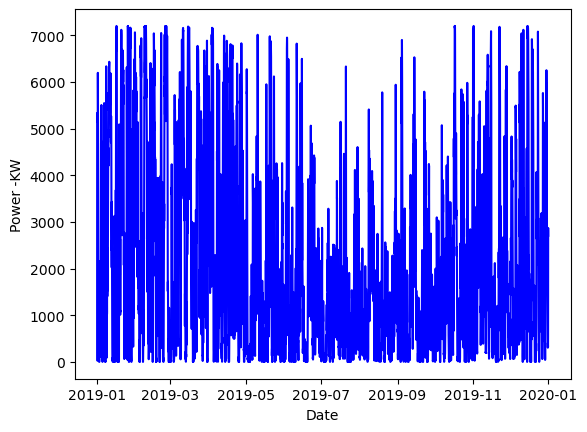

In [67]:
plt.plot(Farm_Power_Output,color ='b')
plt.xlabel('Date')
plt.ylabel('Power -KW')
plt.show()